In [8]:
%matplotlib inline


In [9]:
import pandas as pd
import os
import json
import numpy as np
from nilearn.plotting import plot_stat_map
from nimare.correct import FWECorrector
from nimare.dataset import Dataset
from nimare.utils import get_resource_path
import nibabel as nib
import pickle


In [4]:
data_excel = pd.read_excel("experiment_info_all.xlsx")

In [5]:
# Converting excel file to json format as provided by nimare example 
# https://github.com/neurostuff/NiMARE/blob/main/nimare/tests/data/neurosynth_dset.json
dict_json={}
for study in data_excel["Experiment"].dropna().unique() :
    space=data_excel["Space"][data_excel["Experiment"]==study].to_numpy()
    data_1=data_excel[data_excel["Experiment"]==study]
    for k in np.unique(space):
        temp_data = data_1[data_1["Space"]==k]
        coords_dict = {"space":k.strip()}
        coords_dict["x"]= temp_data["X"].to_list()
        coords_dict["y"]= temp_data["Y"].to_list()
        coords_dict["z"]= temp_data["Z"].to_list()
        dict_json[f'{study}_{k}']={"contrasts":{"1":{"coords":coords_dict,"metadata":{"sample_sizes":len(coords_dict["x"])}}}}
with open("nimare_experiment_info_all.json", "w") as f:
    json.dump(dict_json, f, indent=4)

In [8]:
dset = Dataset("nimare_experiment_info_all.json")

In [ ]:
#ALE
from nimare.meta.cbma.ale import ALE

meta =ALE(null_method="approximate")
results = meta.fit(dset)

corr = FWECorrector(method="montecarlo",n_iters=10000, n_cores=4,voxel_thresh=0.001)
cres = corr.transform(results)



In [8]:
import pickle
with open('cres.pickle', 'wb') as f:
    pickle.dump(cres, f)

In [10]:
# cres =pickle.load( open( "cres.pickle", "rb" ) )

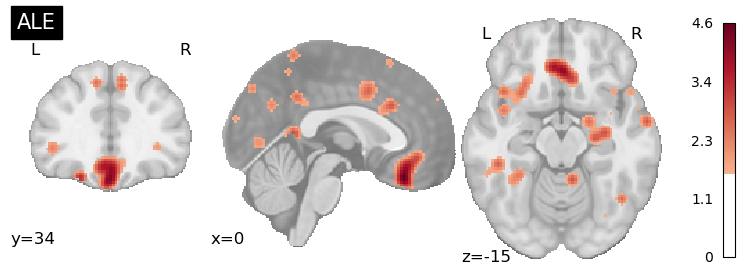

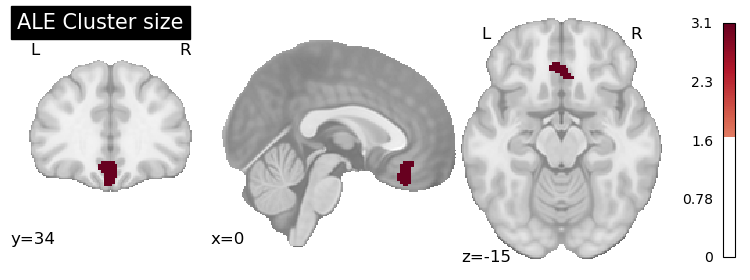

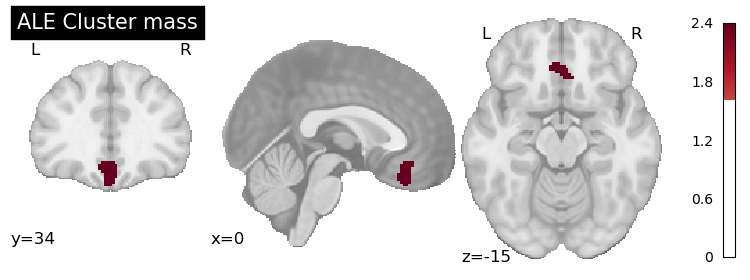

In [11]:
#naming convention for map <value>[_desc-<label>][_level-<cluster|voxel>][_corr-<FWE|FDR>][_method-<label>].nii.gz

plot_stat_map(
    cres.get_map("z"),
    cut_coords=[0, 34, -15],
    draw_cross=False,
    cmap="RdBu_r",
    threshold=1.645,
    title="ALE"
)
plot_stat_map(
    cres.get_map("z_desc-size_level-cluster_corr-FWE_method-montecarlo"),
    cut_coords=[0, 34, -15],
    draw_cross=False,
    cmap="RdBu_r",
    threshold=1.645,
    title="ALE Cluster size"
)
plot_stat_map(
    cres.get_map("z_desc-mass_level-cluster_corr-FWE_method-montecarlo"),
    cut_coords=[0, 34, -15],
    draw_cross=False,
    cmap="RdBu_r",
    threshold=1.645,
    title="ALE Cluster mass"
)

In [ ]:
#MKDA
from nimare.meta.cbma.mkda import MKDADensity

meta_mkda = MKDADensity()
results_mkda = meta_mkda.fit(dset)

corr_mkda = FWECorrector(method="montecarlo", n_iters=10000, n_cores=4)
cres_mkda = corr_mkda.transform(results_mkda)




In [11]:
 with open('cres_mkda.pickle', 'wb') as f:
    pickle.dump(cres_mkda, f)

In [13]:
# cres_mkda= pickle.load( open( "cres_mkda.pickle", "rb" ) )

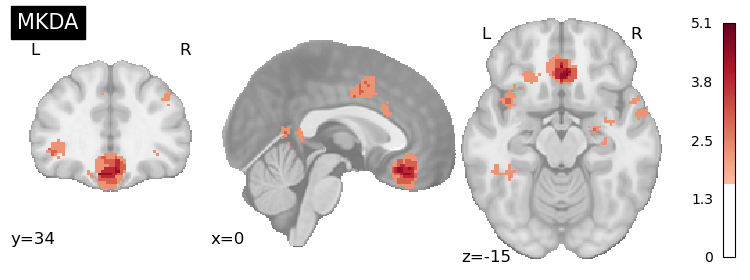

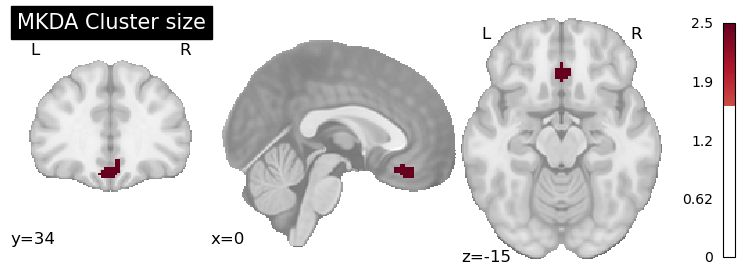

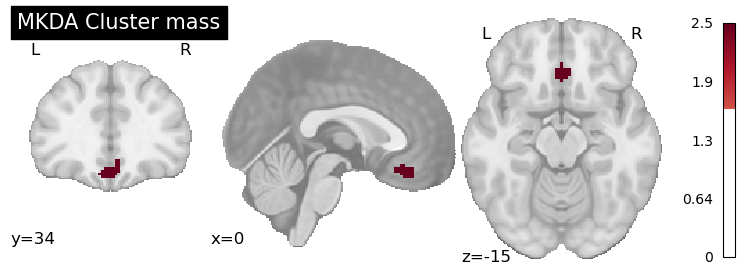

In [14]:

plot_stat_map(
    cres_mkda.get_map("z"),
    cut_coords=[0, 34, -15],
    draw_cross=False,
    cmap="RdBu_r",
    threshold=1.645,
    title="MKDA"
)
plot_stat_map(
    cres_mkda.get_map("z_desc-size_level-cluster_corr-FWE_method-montecarlo"),
    cut_coords=[0, 34, -15],
    draw_cross=False,
    cmap="RdBu_r",
    threshold=1.645,
    title="MKDA Cluster size"
)
plot_stat_map(
    cres_mkda.get_map("z_desc-mass_level-cluster_corr-FWE_method-montecarlo"),
    cut_coords=[0, 34, -15],
    draw_cross=False,
    cmap="RdBu_r",
    threshold=1.645,
    title="MKDA Cluster mass"
)

In [18]:
#Saving images 
to_save_ale_size=cres.get_map("z_desc-size_level-cluster_corr-FWE_method-montecarlo")
to_save_ale_mass=cres.get_map("z_desc-mass_level-cluster_corr-FWE_method-montecarlo")
to_save_mkda_size=cres_mkda.get_map("z_desc-size_level-cluster_corr-FWE_method-montecarlo")
to_save_mkda_mass=cres_mkda.get_map("z_desc-mass_level-cluster_corr-FWE_method-montecarlo")
nib.save(to_save_ale_size, 'CBMA_results\\ale_cFWE_size.nii.gz')
nib.save(to_save_ale_mass, 'CBMA_results\\ale_cFWE_mass.nii.gz')
nib.save(to_save_mkda_size, 'CBMA_results\\mkda_cFWE_size.nii.gz')
nib.save(to_save_mkda_mass, 'CBMA_results\\mkda_cFWE_mass.nii.gz')

In [3]:
mkda_res =pickle.load( open( "cres_mkda.pickle", "rb" ) ).get_map("z_desc-mass_level-cluster_corr-FWE_method-montecarlo")
ale_Res = pickle.load( open( "cres.pickle", "rb" ) ).get_map("z_desc-mass_level-cluster_corr-FWE_method-montecarlo")

In [ ]:
# stat_df = pd.DataFrame(
#     {
#         "MKDA": mkda_res,
#         "ALE": ale_Res,
#         "pyALE": pyale_dat.get_fdata()
#     }
# )
# print(stat_df.corr())

In [41]:
mkda_res.shape

(228483,)

In [5]:
from nilearn.image import load_img

pyale_dat = load_img("..\\pyALE-main_2\\Results\\MainEffect\\Full\\Volumes\\Corrected\\Insomnia_all_aberrant_cFWE05.nii")


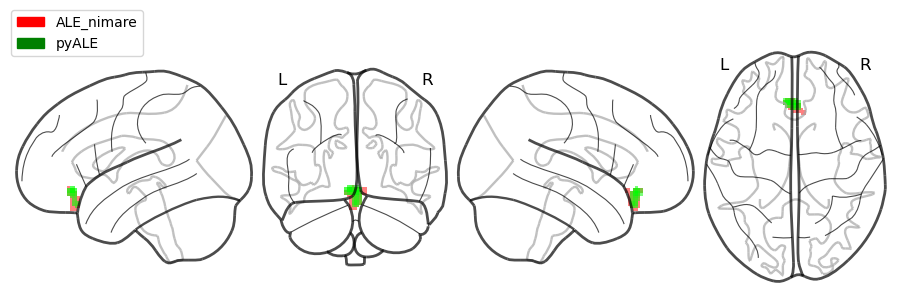

In [7]:
from nilearn import plotting
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# Create the glass brain plot
display = plotting.plot_glass_brain(None, display_mode='lyrz')

# Add the overlays
display.add_overlay(ale_Res, cmap=plotting.cm.red_transparent,threshold=1.645)
display.add_overlay(pyale_dat, cmap=plotting.cm.green_transparent)



fig = plt.gcf()

red_patch = mpatches.Patch(color='red', label='ALE_nimare')
green_patch = mpatches.Patch(color='green', label='pyALE')





legend_axes = fig.add_axes([0.001, 0.9, 0.15, 0.15])  # adjust these values if needed
legend_axes.axis('off')  # hide the axes
 
legend_axes.legend(handles=[ red_patch,green_patch], loc='lower center')
# Show the plot
plotting.show()

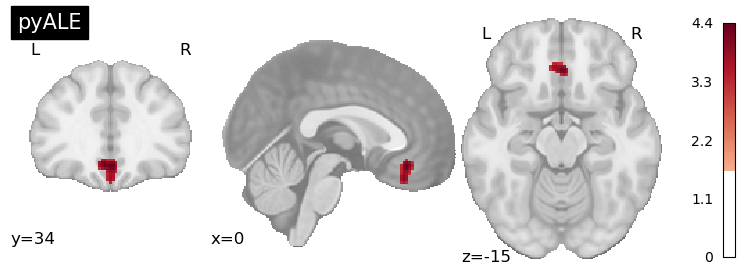

In [44]:
plot_stat_map(
    pyale_dat,
    cut_coords=[0, 34, -15],
    draw_cross=False,
    cmap="RdBu_r",
    threshold=1.645,
    title="pyALE"
)